### Step0: Importing necessary libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step1: Loading and understanding the data

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
numeric_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_var = 'price' # since we have to predict price on the basis of other variables
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

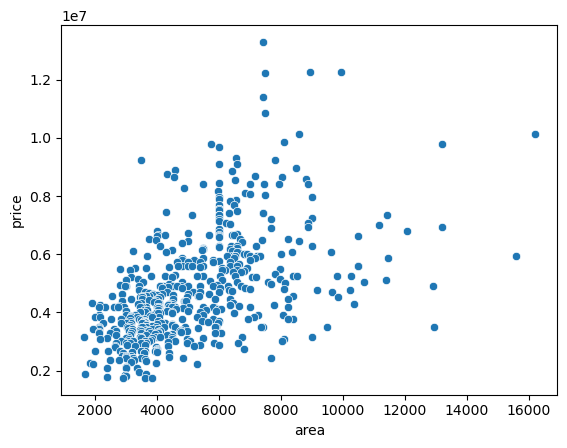

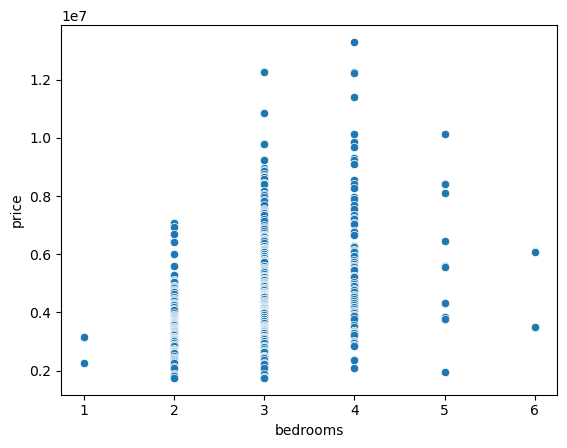

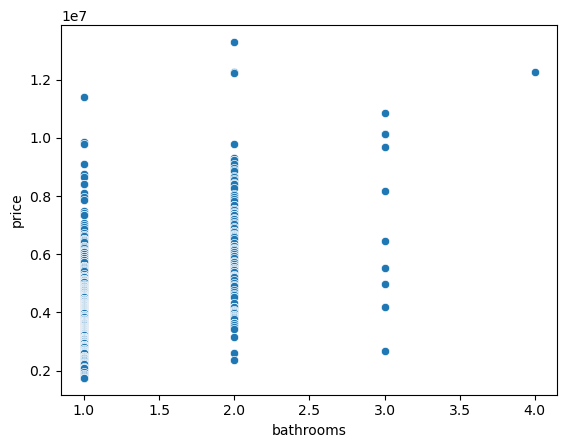

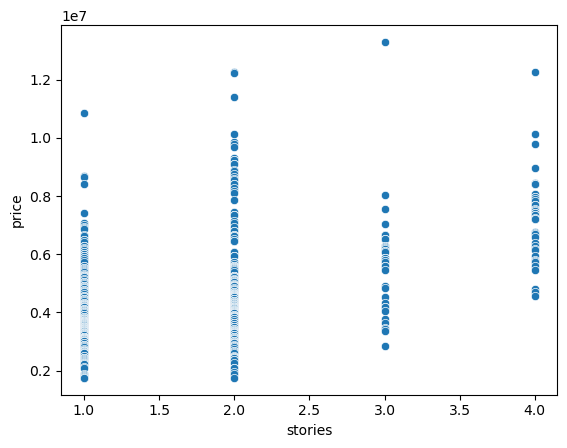

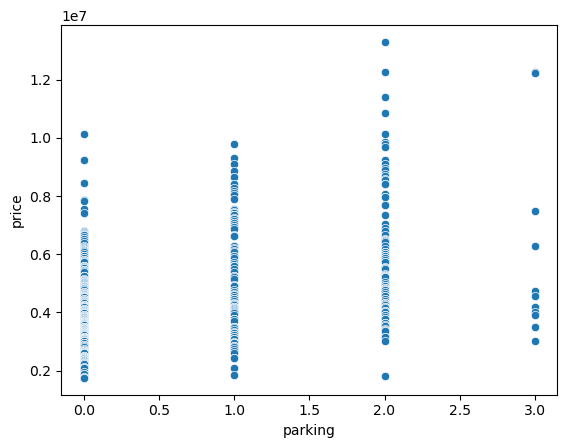

In [5]:
for i in range(1, len(numeric_vars)):
    sns.scatterplot(x=data[numeric_vars[i]], y=data[target_var])
    plt.show()

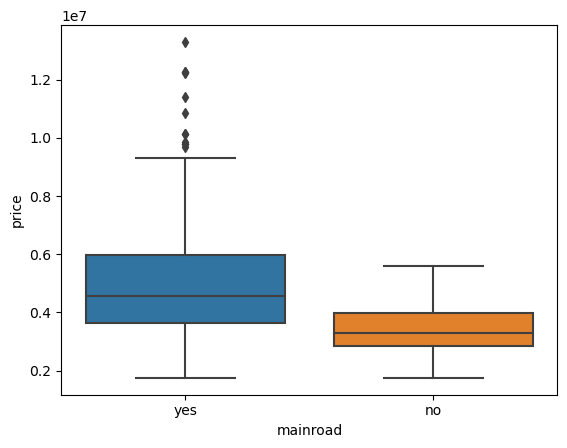

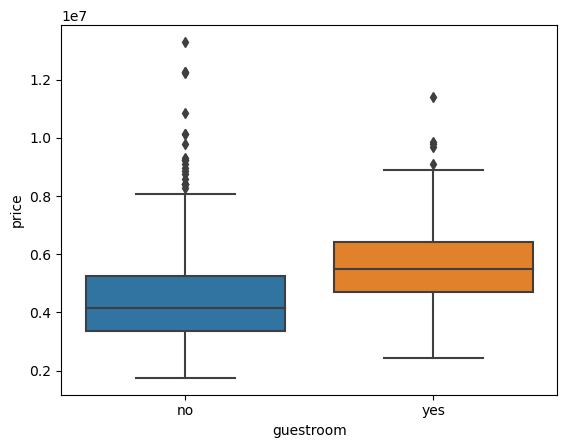

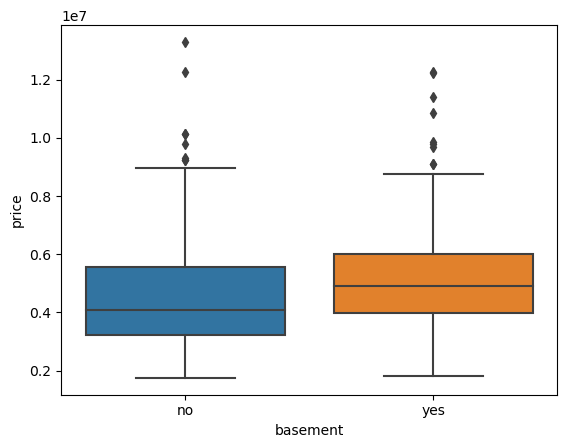

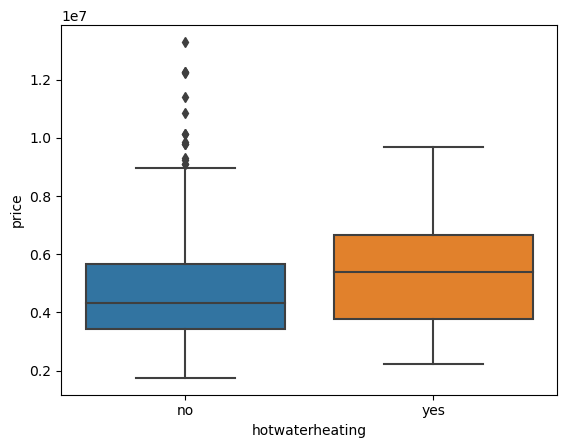

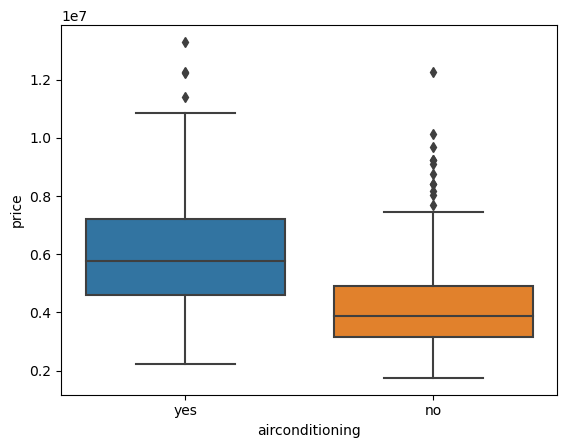

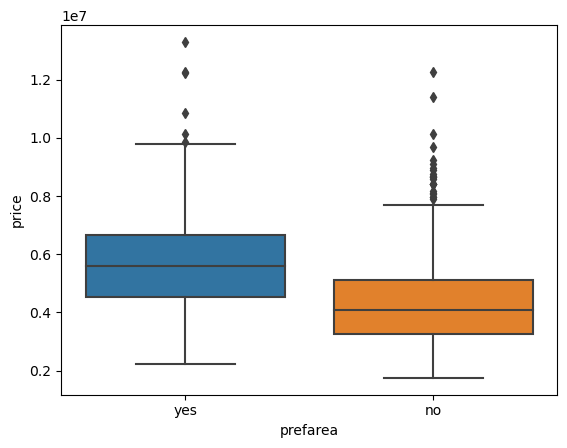

In [6]:
for i in range(0, len(numeric_vars)):
    sns.boxplot(x=data[categorical_vars[i]], y=data[target_var])
    plt.show()

### Step2: Data preparation 

#### handling categorical variables
- converting binary variables to 0/1
- add dummy variables for non binary variables

In [7]:
# converting binary variables to 0 and 1

binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_vars] = data[binary_vars].apply(lambda x: x.map( {'yes': 1, 'no': 0} ))
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
# add dummy variables for non binary variables

data = pd.get_dummies(data=data, columns=['furnishingstatus'], dtype='int32')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [9]:
# remove redundant column

data = data.drop(columns=['furnishingstatus_furnished'], axis=1)

#### split data into train and test using 70-30 rule

In [10]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100)
print(train_data.shape)
print(test_data.shape)

(381, 14)
(164, 14)


#### rescaling of numerical variables

In [11]:
# need to rescale price and area as they are very large in comparison of other variables in dataset
# to rescale we will use min-max-scaling

scaler = MinMaxScaler()
scaler.fit(train_data[numeric_vars])
train_data[numeric_vars] = scaler.transform(train_data[numeric_vars])

In [12]:
train_data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step3: Feature selection and model building

#### feature selection

In [13]:
# create X_train and y_train

y_train = train_data['price']
X_train = train_data.drop(columns=['price'], axis=1)

In [14]:
# model selection with RFE, select top 10 features

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [15]:
for i in range(0, len(X_train.columns)):
    print('{}, {}, {}'.format(X_train.columns[i], rfe.support_[i], rfe.ranking_[i]))

area, True, 1
bedrooms, True, 1
bathrooms, True, 1
stories, True, 1
mainroad, True, 1
guestroom, True, 1
basement, False, 3
hotwaterheating, True, 1
airconditioning, True, 1
parking, True, 1
prefarea, True, 1
furnishingstatus_semi-furnished, False, 4
furnishingstatus_unfurnished, False, 2


With above results we will remove the features who have rank > 1

In [21]:
# our new X_train will be

X_train = X_train.drop(columns=['basement', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], axis=1)
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


#### model building

In [23]:
X_train_sm = sm.add_constant(X_train)

In [25]:
# build the model

model = sm.OLS(y_train, X_train_sm).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.28e-82
Time:                        12:18:23   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# vif computation

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(0, X_train.shape[1])]
vif['VIF'] = vif['VIF'].sort_values(ascending=False)
vif

,Features,VIF
0,area,4.664926
1,bedrooms,5.846197
2,bathrooms,1.643674
3,stories,2.445682
4,mainroad,5.533781
5,guestroom,1.301813
6,hotwaterheating,1.131560
7,airconditioning,1.751412
8,parking,2.109914
9,prefarea,1.466057


In [29]:
# remove furnishingstatus_semi-furnished and bedrooms as it holds high p-value (0.938, 0.206)

X_train = X_train.drop(columns=['bedrooms'], axis = 1)
X_train.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.5,0.333333,1,0,1,0,0.666667,0


In [30]:
# build model again

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           6.67e-83
Time:                        12:19:53   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# vif computation

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(0, X_train.shape[1])]
vif['VIF'] = vif['VIF'].sort_values(ascending=False)
vif

,Features,VIF
0,area,4.516773
1,bathrooms,1.578669
2,stories,2.120356
3,mainroad,4.263472
4,guestroom,1.300287
5,hotwaterheating,1.121364
6,airconditioning,1.748100
7,parking,2.096114
8,prefarea,1.466057


we can see that the VIF value of all the features are less than 5 and thier p-values are also very small(~0). So we can conclude that this is our final model.

### Step4: Residual analysis

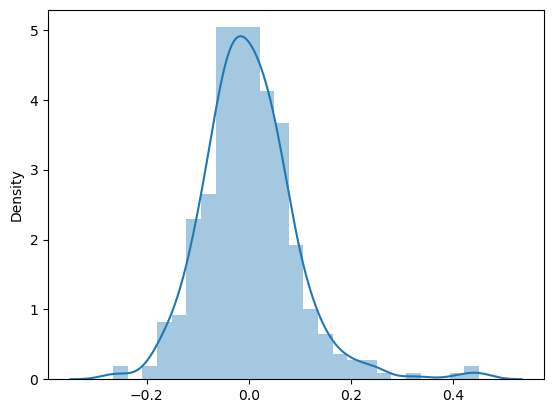

In [32]:
y_train_pred = model.predict(X_train_sm)

err_term = y_train - y_train_pred
sns.distplot(err_term)
plt.show()

### Step5: Prediction and evaluation on test data

In [34]:
# re-scaling on test data

test_data[numeric_vars] = scaler.transform(test_data[numeric_vars])
test_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [35]:
# compute X_test and y_test

y_test = test_data['price']
X_test = test_data.drop(columns=['price', 'bedrooms', 'basement', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], axis = 1)

In [36]:
# add constant on X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,1.0,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0.333333,1
244,1.0,0.306582,0.0,0.333333,1,1,0,0,0.000000,1
268,1.0,0.274023,0.0,0.333333,1,0,0,1,0.000000,0


In [37]:
# prediction on test data

y_test_pred = model.predict(X_test_sm)

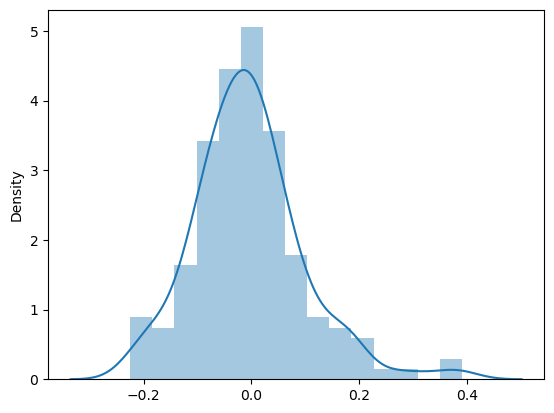

In [38]:
# residual analysis

err_term_test = y_test - y_test_pred
sns.distplot(err_term_test)
plt.show()

In [40]:
# evaluation on r2-score

r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
round(r2, 3)

0.648

In [41]:
model.params

const              0.024223
area               0.236688
bathrooms          0.207021
stories            0.109585
mainroad           0.053643
guestroom          0.038979
hotwaterheating    0.092143
airconditioning    0.071028
parking            0.066868
prefarea           0.065258
dtype: float64